In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.utils import to_categorical

<h1> Galaxies with Redshift less than .1  <h1>

In [ ]:
data2 = pd.read_csv('Data_Collection_.1.csv')

In [ ]:
data2.shape

(91194, 13)

In [ ]:
data2.head()

,specObjID,ra,dec,z,bpt,Flux_OII_3726,Flux_OIII_4363,Flux_Hb_4861,Flux_OIII_5006,Flux_OI_6300,Flux_Ha_6562,Flux_SII_6716,Flux_NII_6583
0,301885788210096128,149.68988,1.003729,0.081116,Star Forming,53.90396,5.944561,84.23373,21.64773,10.261280,294.39160,54.21389,125.23470
1,301887437477537792,149.70765,0.836692,0.012681,Star Forming,697.97780,1.565753,33.86022,34.80893,4.293542,98.68907,29.83614,17.64787
2,301888536989165568,149.64552,1.014263,0.063597,Star Forming,102.47060,2.654379,91.21423,28.29811,9.413630,292.57860,51.82394,92.22236
3,301888811867072512,149.70426,1.081266,0.079338,LINER,269.41360,1.879344,60.12433,41.26509,18.676470,109.98260,16.11730,153.70400
4,301889361622886400,149.65731,0.870752,0.039029,Star Forming,860.42120,3.934724,418.82540,432.62490,43.584850,1335.48600,289.52820,270.23030


In [ ]:
# filtered_df.shape

In [ ]:
Data = {
    'specObjID': data2['specObjID'],
    'ra': data2['ra'],
    'dec': data2['dec'],
    'redshift': data2['z'],
    'Flux_NII_6583/Flux_Ha_6562': data2['Flux_NII_6583']/data2['Flux_Ha_6562'],
    'Flux_OIII_5006/Flux_Hb_4861': data2['Flux_OIII_5006']/data2['Flux_Hb_4861'],
    'Flux_OII_3726/Flux_OIII_5006': data2['Flux_OII_3726']/data2['Flux_OIII_5006'],
    'Flux_OI_6300/Flux_Ha_6562': data2['Flux_OI_6300']/data2['Flux_Ha_6562'],
    'Flux_SII_6716/Flux_Ha_6562': data2['Flux_SII_6716']/data2['Flux_Ha_6562'],
    'Flux_OIII_5006/Flux_OIII_4363':data2['Flux_OIII_5006']/data2['Flux_OIII_4363'],
    'Flux_OII_3726/Flux_Hb_4861': data2['Flux_OII_3726']/data2['Flux_Hb_4861'],
    'Classification': data2['bpt']
}
data = pd.DataFrame(data = Data)

In [ ]:
threshold = 1000

In [ ]:
Q1 = data['Flux_NII_6583/Flux_Ha_6562'].quantile(0.25)
Q3 = data['Flux_NII_6583/Flux_Ha_6562'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_NII_6583/Flux_Ha_6562'] >= lower_bound) & (data['Flux_NII_6583/Flux_Ha_6562'] <= upper_bound)]

In [ ]:
Q1 = data['Flux_OIII_5006/Flux_Hb_4861'].quantile(0.25)
Q3 = data['Flux_OIII_5006/Flux_Hb_4861'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OIII_5006/Flux_Hb_4861'] >= lower_bound) & (data['Flux_OIII_5006/Flux_Hb_4861'] <= upper_bound)]

In [ ]:
Q1 = data['Flux_OII_3726/Flux_OIII_5006'].quantile(0.25)
Q3 = data['Flux_OII_3726/Flux_OIII_5006'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OII_3726/Flux_OIII_5006'] >= lower_bound) & (data['Flux_OII_3726/Flux_OIII_5006'] <= upper_bound)]

In [ ]:
Q1 = data['Flux_OI_6300/Flux_Ha_6562'].quantile(0.25)
Q3 = data['Flux_OI_6300/Flux_Ha_6562'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OI_6300/Flux_Ha_6562'] >= lower_bound) & (data['Flux_OI_6300/Flux_Ha_6562'] <= upper_bound)]

In [ ]:
Q1 = data['Flux_SII_6716/Flux_Ha_6562'].quantile(0.25)
Q3 = data['Flux_SII_6716/Flux_Ha_6562'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_SII_6716/Flux_Ha_6562'] >= lower_bound) & (data['Flux_SII_6716/Flux_Ha_6562'] <= upper_bound)]

In [ ]:
Q1 = data['Flux_OIII_5006/Flux_OIII_4363'].quantile(0.25)
Q3 = data['Flux_OIII_5006/Flux_OIII_4363'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OIII_5006/Flux_OIII_4363'] >= lower_bound) & (data['Flux_OIII_5006/Flux_OIII_4363'] <= upper_bound)]

In [ ]:
Q1 = data['Flux_OII_3726/Flux_Hb_4861'].quantile(0.25)
Q3 = data['Flux_OII_3726/Flux_Hb_4861'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
training_data = data[(data['Flux_OII_3726/Flux_Hb_4861'] >= lower_bound) & (data['Flux_OII_3726/Flux_Hb_4861'] <= upper_bound)]

In [ ]:
#Value Counts Table
counts = training_data['Classification'].value_counts()
counts_df_training = pd.DataFrame(counts).reset_index()
counts_df_training.columns = ['BPT Category', 'Count']

total_count = 0
for index, row in counts_df_training.iterrows():
  total_count += row['Count']
print(total_count)

percentages = []
for index, row in counts_df_training.iterrows():
  percent = row['Count']/total_count * 100
  percentages.append(round(percent, 2))
print(percentages)
counts_df_training['Percent'] = percentages
counts_df_training


90281
[68.63, 17.05, 10.17, 4.15]


,BPT Category,Count,Percent
0,Star Forming,61960,68.63
1,Composite,15391,17.05
2,LINER,9185,10.17
3,Seyfert,3745,4.15


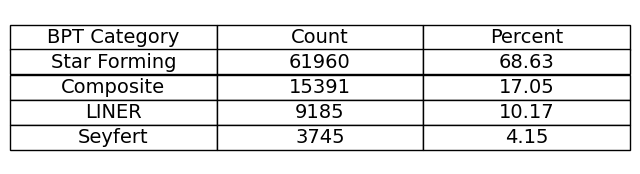

In [ ]:
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')
ax.set_frame_on(False)

# Create a table with custom cell colors, cell text colors, and font size
table = ax.table(cellText=counts_df_training.values, colLabels=counts_df_training.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(14)

# Adjust cell height and width
table.scale(1, 1.5)


# Display the table in the Jupyter Notebook
#plt.show()
plt.savefig('training_set.png', bbox_inches='tight', dpi=300)

In [ ]:
plt.savefig('traning_set_table.png', bbox_inches='tight', dpi=300)

<Figure size 640x480 with 0 Axes>

This table illustrates the distribution of galaxies among various classifications, along with the corresponding percentage each classification represents within the entire sample of galaxies. The galaxies taken here are restricted to galaxies with a redshift less than .1 and filter out outliers that drastically skew the mean. The proportion represented by each galaxy will be valuable in determining the weighting scheme required for our Machine Learning Model's loss function.


In [ ]:
def get_mean_vals(x):
  return pd.Series({'Average Flux_NII_6583/Flux_Ha_6562 Ratio': round(x['Flux_NII_6583/Flux_Ha_6562'].mean(),4),
  'Average Flux_OIII_5006/Flux_Hb_4861 Ratio': round(x['Flux_OIII_5006/Flux_Hb_4861'].mean(),4),
  'Average Flux_OII_3726/Flux_OIII_5006 Ratio': round(x['Flux_OII_3726/Flux_OIII_5006'].mean(),4),
  'Average Flux_OI_6300/Flux_Ha_6562 Ratio':round(x['Flux_OI_6300/Flux_Ha_6562'].mean(),4),
  'Average Flux_SII_6716/Flux_Ha_6562 Ratio': round(x['Flux_SII_6716/Flux_Ha_6562'].mean(),4),
  'Average Flux_OIII_5006/Flux_OIII_4363 Ratio': round(x['Flux_OIII_5006/Flux_OIII_4363'].mean(),4),
  'Average Flux_OII_3726/Flux_Hb_4861 Ratio': round(x['Flux_OII_3726/Flux_Hb_4861'].mean(),4)
  })


mean_value_table = data.groupby('Classification').apply(get_mean_vals)
mean_value_table



,Average Flux_NII_6583/Flux_Ha_6562 Ratio,Average Flux_OIII_5006/Flux_Hb_4861 Ratio,Average Flux_OII_3726/Flux_OIII_5006 Ratio,Average Flux_OI_6300/Flux_Ha_6562 Ratio,Average Flux_SII_6716/Flux_Ha_6562 Ratio,Average Flux_OIII_5006/Flux_OIII_4363 Ratio,Average Flux_OII_3726/Flux_Hb_4861 Ratio
Classification,,,,,,,
Composite,0.6914,0.7895,5.0420,0.1340,0.2475,48.5871,2.4682
LINER,1.5924,1.5553,3.2705,0.3547,0.4975,48.6734,4.1938
Seyfert,0.9448,7.2715,1.9412,0.2068,0.3241,110.0261,16.0795
Star Forming,0.2957,0.8945,4.5481,0.0512,0.1947,72.0843,3.1381


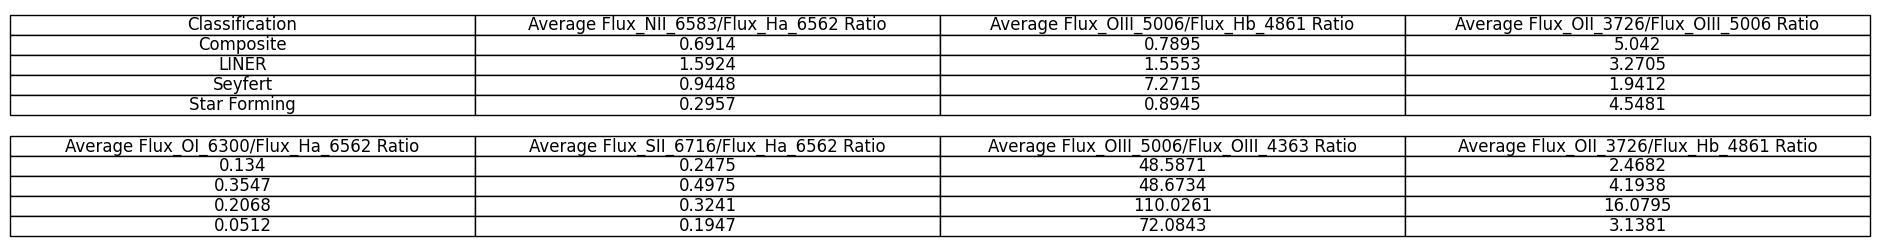

In [ ]:
# Split the columns into two groups, top 4 and bottom 3
mean_value_table = mean_value_table.reset_index()
top_columns = mean_value_table.columns[:4]
bottom_columns = mean_value_table.columns[4:]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 3))

# Hide axes
ax.axis('off')

# Create a table visualization for the top 4 columns
top_table_data = [mean_value_table[top_columns].columns.tolist()] + mean_value_table[top_columns].values.tolist()
top_table = ax.table(cellText=top_table_data, loc='upper center', cellLoc='center')
top_table.auto_set_font_size(False)
top_table.set_fontsize(12)
top_table.scale(1.2, 1.2)

# Create a table visualization for the bottom 3 columns
bottom_table_data = [mean_value_table[bottom_columns].columns.tolist()] + mean_value_table[bottom_columns].values.tolist()
bottom_table = ax.table(cellText=bottom_table_data, loc='lower center', cellLoc='center')
bottom_table.auto_set_font_size(False)
bottom_table.set_fontsize(12)
bottom_table.scale(1.2, 1.2)

# Adjust the space between the two tables
plt.subplots_adjust(hspace=0.1)  # You can adjust the hspace value to control the spacing

# Save the table as a PNG image
plt.savefig('mean_value_table.png', bbox_inches='tight')

This table illustrates the average flux ratio measurements for each galaxy classification, for the training set.

In [ ]:
def get_median_vals(x):
      return pd.Series({'Median Flux_NII_6583/Flux_Ha_6562 Ratio': round(x['Flux_NII_6583/Flux_Ha_6562'].median(),4),
                       'Median Flux_OIII_5006/Flux_Hb_4861 Ratio': round(x['Flux_OIII_5006/Flux_Hb_4861'].median(),4),
                       'Median Flux_OII_3726/Flux_OIII_5006 Ratio': round(x['Flux_OII_3726/Flux_OIII_5006'].median(),4),
                       'Median Flux_OI_6300/Flux_Ha_6562 Ratio': round(x['Flux_OI_6300/Flux_Ha_6562'].median(),4),
                       'Median Flux_SII_6716/Flux_Ha_6562 Ratio': round(x['Flux_SII_6716/Flux_Ha_6562'].median(),4),
                       'Median Flux_OIII_5006/Flux_OIII_4363 Ratio': round(x['Flux_OIII_5006/Flux_OIII_4363'].median(),4),
                       'Median Flux_OII_3726/Flux_Hb_4861 Ratio': round(x['Flux_OII_3726/Flux_Hb_4861'].median(),4)
                       })

median_value_table = data.groupby('Classification').apply(get_median_vals)
median_value_table

,Median Flux_NII_6583/Flux_Ha_6562 Ratio,Median Flux_OIII_5006/Flux_Hb_4861 Ratio,Median Flux_OII_3726/Flux_OIII_5006 Ratio,Median Flux_OI_6300/Flux_Ha_6562 Ratio,Median Flux_SII_6716/Flux_Ha_6562 Ratio,Median Flux_OIII_5006/Flux_OIII_4363 Ratio,Median Flux_OII_3726/Flux_Hb_4861 Ratio
Classification,,,,,,,
Composite,0.6493,0.6751,2.2917,0.0744,0.2154,5.9835,1.5732
LINER,1.3331,1.3771,1.9185,0.1949,0.3778,7.3796,2.6228
Seyfert,0.8571,4.7105,0.4966,0.1200,0.2751,36.2225,2.1771
Star Forming,0.3170,0.5251,2.0362,0.0364,0.1912,8.5725,1.2252


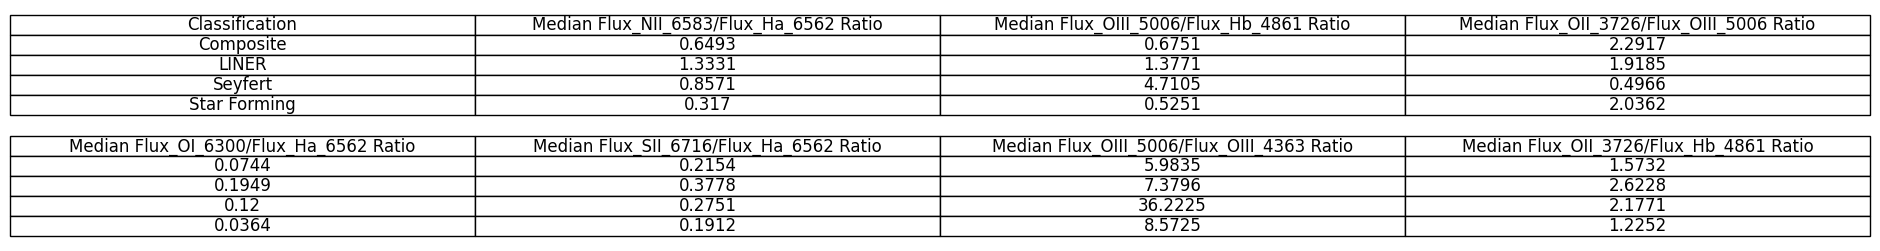

In [ ]:
# Split the columns into two groups, top 4 and bottom 3
median_value_table = median_value_table.reset_index()
top_columns = median_value_table.columns[:4]
bottom_columns = median_value_table.columns[4:]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 3))

# Hide axes
ax.axis('off')

# Create a table visualization for the top 4 columns
top_table_data = [median_value_table[top_columns].columns.tolist()] + median_value_table[top_columns].values.tolist()
top_table = ax.table(cellText=top_table_data, loc='upper center', cellLoc='center')
top_table.auto_set_font_size(False)
top_table.set_fontsize(12)
top_table.scale(1.2, 1.2)

# Create a table visualization for the bottom 3 columns
bottom_table_data = [median_value_table[bottom_columns].columns.tolist()] + median_value_table[bottom_columns].values.tolist()
bottom_table = ax.table(cellText=bottom_table_data, loc='lower center', cellLoc='center')
bottom_table.auto_set_font_size(False)
bottom_table.set_fontsize(12)
bottom_table.scale(1.2, 1.2)

# Adjust the space between the two tables
plt.subplots_adjust(hspace=0.1)  # You can adjust the hspace value to control the spacing

# Save the table as a PNG image
plt.savefig('meadian_value_table.png', bbox_inches='tight')

<h1> Testing Set Information <h1>


In [ ]:
data3 = pd.read_csv('Testing_.15.csv')

In [ ]:
Data = {
    'specObjID': data3['specObjID'],
    'ra': data3['ra'],
    'dec': data3['dec'],
    'redshift': data3['z'],
    'Flux_NII_6583/Flux_Ha_6562': data3['Flux_NII_6583']/data3['Flux_Ha_6562'],
    'Flux_OIII_5006/Flux_Hb_4861': data3['Flux_OIII_5006']/data3['Flux_Hb_4861'],
    'Flux_OII_3726/Flux_OIII_5006': data3['Flux_OII_3726']/data3['Flux_OIII_5006'],
    'Flux_OI_6300/Flux_Ha_6562': data3['Flux_OI_6300']/data3['Flux_Ha_6562'],
    'Flux_SII_6716/Flux_Ha_6562': data3['Flux_SII_6716']/data3['Flux_Ha_6562'],
    'Flux_OIII_5006/Flux_OIII_4363':data3['Flux_OIII_5006']/data3['Flux_OIII_4363'],
    'Flux_OII_3726/Flux_Hb_4861': data3['Flux_OII_3726']/data3['Flux_Hb_4861'],
    'Classification': data3['bpt']
}
data = pd.DataFrame(data = Data)

In [ ]:
threshold = 1000

In [ ]:
Q1 = data['Flux_NII_6583/Flux_Ha_6562'].quantile(0.25)
Q3 = data['Flux_NII_6583/Flux_Ha_6562'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_NII_6583/Flux_Ha_6562'] >= lower_bound) & (data['Flux_NII_6583/Flux_Ha_6562'] <= upper_bound)]

In [ ]:
Q1 = data['Flux_OIII_5006/Flux_Hb_4861'].quantile(0.25)
Q3 = data['Flux_OIII_5006/Flux_Hb_4861'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OIII_5006/Flux_Hb_4861'] >= lower_bound) & (data['Flux_OIII_5006/Flux_Hb_4861'] <= upper_bound)]

In [ ]:
Q1 = data['Flux_OII_3726/Flux_OIII_5006'].quantile(0.25)
Q3 = data['Flux_OII_3726/Flux_OIII_5006'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OII_3726/Flux_OIII_5006'] >= lower_bound) & (data['Flux_OII_3726/Flux_OIII_5006'] <= upper_bound)]

In [ ]:
Q1 = data['Flux_OI_6300/Flux_Ha_6562'].quantile(0.25)
Q3 = data['Flux_OI_6300/Flux_Ha_6562'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OI_6300/Flux_Ha_6562'] >= lower_bound) & (data['Flux_OI_6300/Flux_Ha_6562'] <= upper_bound)]

In [ ]:
Q1 = data['Flux_SII_6716/Flux_Ha_6562'].quantile(0.25)
Q3 = data['Flux_SII_6716/Flux_Ha_6562'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_SII_6716/Flux_Ha_6562'] >= lower_bound) & (data['Flux_SII_6716/Flux_Ha_6562'] <= upper_bound)]

In [ ]:
Q1 = data['Flux_OIII_5006/Flux_OIII_4363'].quantile(0.25)
Q3 = data['Flux_OIII_5006/Flux_OIII_4363'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OIII_5006/Flux_OIII_4363'] >= lower_bound) & (data['Flux_OIII_5006/Flux_OIII_4363'] <= upper_bound)]

In [ ]:
Q1 = data['Flux_OII_3726/Flux_Hb_4861'].quantile(0.25)
Q3 = data['Flux_OII_3726/Flux_Hb_4861'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OII_3726/Flux_Hb_4861'] >= lower_bound) & (data['Flux_OII_3726/Flux_Hb_4861'] <= upper_bound)]

In [ ]:
#Value Counts Table
counts = data['Classification'].value_counts()
counts_df_test_1 = pd.DataFrame(counts).reset_index()
counts_df_test_1.columns = ['BPT Category', 'Count']

total_count = 0
for index, row in counts_df_test_1.iterrows():
  total_count += row['Count']
print(total_count)

percentages = []
for index, row in counts_df_test_1.iterrows():
  percent = row['Count']/total_count * 100
  percentages.append(round(percent, 2))
print(percentages)
counts_df_test_1['Percent'] = percentages
counts_df_test_1


133980
[61.48, 19.93, 12.8, 5.78]


,BPT Category,Count,Percent
0,Star Forming,82376,61.48
1,Composite,26703,19.93
2,LINER,17155,12.80
3,Seyfert,7746,5.78


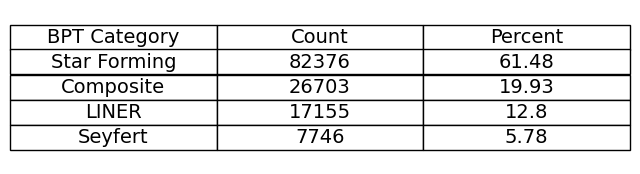

In [ ]:
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')
ax.set_frame_on(False)

# Create a table with custom cell colors, cell text colors, and font size
table = ax.table(cellText=counts_df_test_1.values, colLabels=counts_df_test_1.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(14)

# Adjust cell height and width
table.scale(1, 1.5)


# Display the table in the Jupyter Notebook
#plt.show()
plt.savefig('testing_set_1.png', bbox_inches='tight', dpi=300)

In [ ]:
data4 = pd.read_csv('Testing_.3.csv')

In [ ]:
Data = {
    'specObjID': data4['specObjID'],
    'ra': data4['ra'],
    'dec': data4['dec'],
    'redshift': data4['z'],
    'Flux_NII_6583/Flux_Ha_6562': data4['Flux_NII_6583']/data4['Flux_Ha_6562'],
    'Flux_OIII_5006/Flux_Hb_4861': data4['Flux_OIII_5006']/data4['Flux_Hb_4861'],
    'Flux_OII_3726/Flux_OIII_5006': data4['Flux_OII_3726']/data4['Flux_OIII_5006'],
    'Flux_OI_6300/Flux_Ha_6562': data4['Flux_OI_6300']/data4['Flux_Ha_6562'],
    'Flux_SII_6716/Flux_Ha_6562': data4['Flux_SII_6716']/data4['Flux_Ha_6562'],
    'Flux_OIII_5006/Flux_OIII_4363':data4['Flux_OIII_5006']/data4['Flux_OIII_4363'],
    'Flux_OII_3726/Flux_Hb_4861': data4['Flux_OII_3726']/data4['Flux_Hb_4861'],
    'Classification': data4['bpt']
}
data = pd.DataFrame(data = Data)

In [ ]:
Q1 = data['Flux_NII_6583/Flux_Ha_6562'].quantile(0.25)
Q3 = data['Flux_NII_6583/Flux_Ha_6562'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_NII_6583/Flux_Ha_6562'] >= lower_bound) & (data['Flux_NII_6583/Flux_Ha_6562'] <= upper_bound)]

In [ ]:
Q1 = data['Flux_OIII_5006/Flux_Hb_4861'].quantile(0.25)
Q3 = data['Flux_OIII_5006/Flux_Hb_4861'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OIII_5006/Flux_Hb_4861'] >= lower_bound) & (data['Flux_OIII_5006/Flux_Hb_4861'] <= upper_bound)]

In [ ]:
Q1 = data['Flux_OII_3726/Flux_OIII_5006'].quantile(0.25)
Q3 = data['Flux_OII_3726/Flux_OIII_5006'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OII_3726/Flux_OIII_5006'] >= lower_bound) & (data['Flux_OII_3726/Flux_OIII_5006'] <= upper_bound)]

In [ ]:
Q1 = data['Flux_OI_6300/Flux_Ha_6562'].quantile(0.25)
Q3 = data['Flux_OI_6300/Flux_Ha_6562'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OI_6300/Flux_Ha_6562'] >= lower_bound) & (data['Flux_OI_6300/Flux_Ha_6562'] <= upper_bound)]

In [ ]:
Q1 = data['Flux_SII_6716/Flux_Ha_6562'].quantile(0.25)
Q3 = data['Flux_SII_6716/Flux_Ha_6562'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_SII_6716/Flux_Ha_6562'] >= lower_bound) & (data['Flux_SII_6716/Flux_Ha_6562'] <= upper_bound)]

In [ ]:
Q1 = data['Flux_OIII_5006/Flux_OIII_4363'].quantile(0.25)
Q3 = data['Flux_OIII_5006/Flux_OIII_4363'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OIII_5006/Flux_OIII_4363'] >= lower_bound) & (data['Flux_OIII_5006/Flux_OIII_4363'] <= upper_bound)]

In [ ]:
Q1 = data['Flux_OII_3726/Flux_Hb_4861'].quantile(0.25)
Q3 = data['Flux_OII_3726/Flux_Hb_4861'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OII_3726/Flux_Hb_4861'] >= lower_bound) & (data['Flux_OII_3726/Flux_Hb_4861'] <= upper_bound)]

In [ ]:
#Value Counts Table
counts = data['Classification'].value_counts()
counts_df_3 = pd.DataFrame(counts).reset_index()
counts_df_3.columns = ['BPT Category', 'Count']

total_count = 0
for index, row in counts_df_3.iterrows():
  total_count += row['Count']
print(total_count)

percentages = []
for index, row in counts_df_3.iterrows():
  percent = row['Count']/total_count * 100
  percentages.append(round(percent, 2))
print(percentages)
counts_df_3['Percent'] = percentages
counts_df_3


173218
[55.11, 21.47, 16.13, 7.3]


,BPT Category,Count,Percent
0,Star Forming,95452,55.11
1,Composite,37185,21.47
2,LINER,27941,16.13
3,Seyfert,12640,7.30


In [ ]:

LINERS = training_data[training_data['Classification'] == 'LINER']
LINER_Data = {
    'Flux_NII_6583/Flux_Ha_6562': np.log(LINERS['Flux_NII_6583/Flux_Ha_6562']),
    'Flux_OIII_5006/Flux_Hb_4861': np.log(LINERS['Flux_OIII_5006/Flux_Hb_4861']),
    'Flux_OII_3726/Flux_OIII_5006': np.log(LINERS['Flux_OII_3726/Flux_OIII_5006']),
    'Flux_OI_6300/Flux_Ha_6562': np.log(LINERS['Flux_OI_6300/Flux_Ha_6562']),
    'Flux_SII_6716/Flux_Ha_6562': np.log(LINERS['Flux_SII_6716/Flux_Ha_6562']),
    'Flux_OIII_5006/Flux_OIII_4363': np.log(LINERS['Flux_OIII_5006/Flux_OIII_4363']),
    'Flux_OII_3726/Flux_Hb_4861': np.log(LINERS['Flux_OII_3726/Flux_Hb_4861']),
}
LINER_df = pd.DataFrame(data = LINER_Data)
LINER_df.head()



,Flux_NII_6583/Flux_Ha_6562,Flux_OIII_5006/Flux_Hb_4861,Flux_OII_3726/Flux_OIII_5006,Flux_OI_6300/Flux_Ha_6562,Flux_SII_6716/Flux_Ha_6562,Flux_OIII_5006/Flux_OIII_4363,Flux_OII_3726/Flux_Hb_4861
3,0.334707,-0.376398,1.876231,-1.773058,-1.920429,3.089094,1.499833
7,0.243316,0.296613,0.641083,-1.129113,-1.579583,3.635360,0.937696
8,0.684477,-0.588874,-0.950818,-0.349286,-1.321744,6.406708,-1.539692
9,0.676231,1.549281,-1.297580,-1.296507,-0.558388,2.696962,0.251701
12,0.261431,0.820974,1.336300,-1.590824,-0.826969,3.022472,2.157274


In [ ]:
Star_Forming = training_data[training_data['Classification'] == 'Star Forming']
Star_Forming_Data = {
    'Flux_NII_6583/Flux_Ha_6562': np.log(Star_Forming['Flux_NII_6583/Flux_Ha_6562']),
    'Flux_OIII_5006/Flux_Hb_4861': np.log(Star_Forming['Flux_OIII_5006/Flux_Hb_4861']),
    'Flux_OII_3726/Flux_OIII_5006': np.log(Star_Forming['Flux_OII_3726/Flux_OIII_5006']),
    'Flux_OI_6300/Flux_Ha_6562': np.log(Star_Forming['Flux_OI_6300/Flux_Ha_6562']),
    'Flux_SII_6716/Flux_Ha_6562': np.log(Star_Forming['Flux_SII_6716/Flux_Ha_6562']),
    'Flux_OIII_5006/Flux_OIII_4363': np.log(Star_Forming['Flux_OIII_5006/Flux_OIII_4363']),
    'Flux_OII_3726/Flux_Hb_4861': np.log(Star_Forming['Flux_OII_3726/Flux_Hb_4861']),
}
Star_Forming_df = pd.DataFrame(data = Star_Forming_Data)
Star_Forming_df.head()

,Flux_NII_6583/Flux_Ha_6562,Flux_OIII_5006/Flux_Hb_4861,Flux_OII_3726/Flux_OIII_5006,Flux_OI_6300/Flux_Ha_6562,Flux_SII_6716/Flux_Ha_6562,Flux_OIII_5006/Flux_OIII_4363,Flux_OII_3726/Flux_Hb_4861
0,-0.854721,-1.358695,0.912303,-3.356533,-1.691974,1.292424,-0.446391
1,-1.721359,0.027633,2.998313,-3.134862,-1.196254,3.101507,3.025946
2,-1.154531,-1.170416,1.286781,-3.436575,-1.730881,2.366584,0.116365
4,-1.597776,0.032417,0.687551,-3.422341,-1.528798,4.700030,0.719968
5,-1.736759,0.276744,0.024933,-3.915766,-1.834525,3.625735,0.301676


In [ ]:
Composite = training_data[training_data['Classification'] == 'Composite']
Composite_Data = {
    'Flux_NII_6583/Flux_Ha_6562': np.log(Composite['Flux_NII_6583/Flux_Ha_6562']),
    'Flux_OIII_5006/Flux_Hb_4861': np.log(Composite['Flux_OIII_5006/Flux_Hb_4861']),
    'Flux_OII_3726/Flux_OIII_5006': np.log(Composite['Flux_OII_3726/Flux_OIII_5006']),
    'Flux_OI_6300/Flux_Ha_6562': np.log(Composite['Flux_OI_6300/Flux_Ha_6562']),
    'Flux_SII_6716/Flux_Ha_6562': np.log(Composite['Flux_SII_6716/Flux_Ha_6562']),
    'Flux_OIII_5006/Flux_OIII_4363': np.log(Composite['Flux_OIII_5006/Flux_OIII_4363']),
    'Flux_OII_3726/Flux_Hb_4861': np.log(Composite['Flux_OII_3726/Flux_Hb_4861']),
}
Composite_df = pd.DataFrame(data = Composite_Data)
Composite_df.head()

,Flux_NII_6583/Flux_Ha_6562,Flux_OIII_5006/Flux_Hb_4861,Flux_OII_3726/Flux_OIII_5006,Flux_OI_6300/Flux_Ha_6562,Flux_SII_6716/Flux_Ha_6562,Flux_OIII_5006/Flux_OIII_4363,Flux_OII_3726/Flux_Hb_4861
6,-0.431564,-1.280456,1.341139,-1.798516,-0.865713,1.443892,0.060683
10,-0.260459,0.098976,-0.000842,-2.276672,-1.222430,1.130226,0.098134
11,-0.537772,-0.233001,0.932919,-3.306872,-1.644521,2.619690,0.699918
21,0.063831,-0.448820,2.333678,-3.159738,-1.102693,1.506733,1.884858
27,-0.014250,-0.238612,1.154704,-1.914908,-1.452572,2.802622,0.916092


In [ ]:
Seyfert = training_data[training_data['Classification'] == 'Seyfert']
Seyfert_Data = {
    'Flux_NII_6583/Flux_Ha_6562': np.log(Seyfert['Flux_NII_6583/Flux_Ha_6562']),
    'Flux_OIII_5006/Flux_Hb_4861': np.log(Seyfert['Flux_OIII_5006/Flux_Hb_4861']),
    'Flux_OII_3726/Flux_OIII_5006': np.log(Seyfert['Flux_OII_3726/Flux_OIII_5006']),
    'Flux_OI_6300/Flux_Ha_6562': np.log(Seyfert['Flux_OI_6300/Flux_Ha_6562']),
    'Flux_SII_6716/Flux_Ha_6562': np.log(Seyfert['Flux_SII_6716/Flux_Ha_6562']),
    'Flux_OIII_5006/Flux_OIII_4363': np.log(Seyfert['Flux_OIII_5006/Flux_OIII_4363']),
    'Flux_OII_3726/Flux_Hb_4861': np.log(Seyfert['Flux_OII_3726/Flux_Hb_4861']),
}
Seyfert_df = pd.DataFrame(data = Seyfert_Data)
Seyfert_df.head()

,Flux_NII_6583/Flux_Ha_6562,Flux_OIII_5006/Flux_Hb_4861,Flux_OII_3726/Flux_OIII_5006,Flux_OI_6300/Flux_Ha_6562,Flux_SII_6716/Flux_Ha_6562,Flux_OIII_5006/Flux_OIII_4363,Flux_OII_3726/Flux_Hb_4861
60,-0.316903,1.648969,0.950102,-1.051783,-1.766068,2.256136,2.599071
64,-0.483400,0.876971,0.232527,-1.198148,-1.911236,3.228668,1.109498
66,0.215160,1.455034,-0.072739,-2.386528,-0.677688,3.163847,1.382295
72,0.436257,2.019621,1.048530,-1.676286,-0.336831,0.533244,3.068151
94,0.469456,2.435977,0.201348,-1.426590,-0.865510,5.760167,2.637326


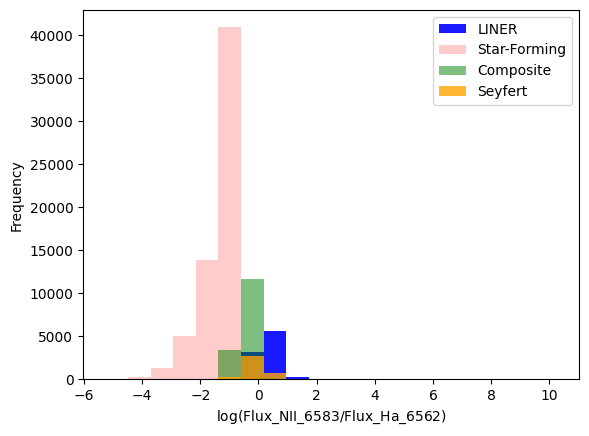

In [ ]:
plt.hist(LINER_df['Flux_NII_6583/Flux_Ha_6562'], bins=20, alpha=0.9, label='LINER', color='blue', range=(-5.25, 10.25))
plt.hist(Star_Forming_df['Flux_NII_6583/Flux_Ha_6562'], bins=20, alpha=0.2, label='Star-Forming', color='red', range=(-5.25, 10.25))
plt.hist(Composite_df['Flux_NII_6583/Flux_Ha_6562'], bins=20, alpha=0.5, label='Composite', color='green', range=(-5.25, 10.25))
plt.hist(Seyfert_df['Flux_NII_6583/Flux_Ha_6562'], bins=20, alpha=0.8, label='Seyfert', color='orange', range=(-5.25, 10.25))


# Add labels and legend
plt.xlabel(r'$\log(\mathrm{Flux\_NII\_6583/Flux\_Ha\_6562})$')
plt.ylabel('Frequency')
plt.legend(loc='upper right')


# Apply custom ticks to the x-axis

# Show the plot
plt.savefig('plot_1.png', bbox_inches='tight')
#plt.show()

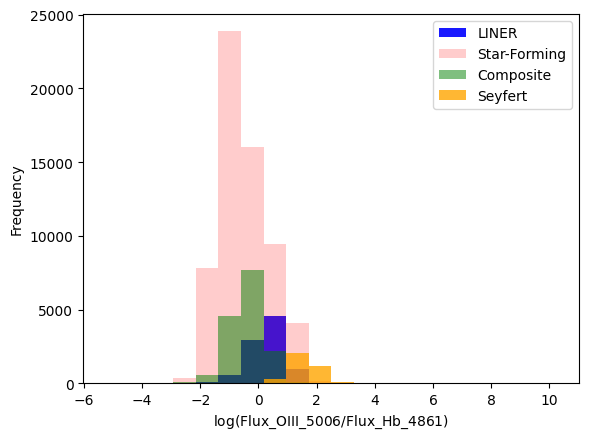

In [ ]:
plt.hist(LINER_df['Flux_OIII_5006/Flux_Hb_4861'], bins=20, alpha=0.9, label='LINER', color='blue', range=(-5.25, 10.25))
plt.hist(Star_Forming_df['Flux_OIII_5006/Flux_Hb_4861'], bins=20, alpha=0.2, label='Star-Forming', color='red', range=(-5.25, 10.25))
plt.hist(Composite_df['Flux_OIII_5006/Flux_Hb_4861'], bins=20, alpha=0.5, label='Composite', color='green', range=(-5.25, 10.25))
plt.hist(Seyfert_df['Flux_OIII_5006/Flux_Hb_4861'], bins=20, alpha=0.8, label='Seyfert', color='orange', range=(-5.25, 10.25))


# Add labels and legend
plt.xlabel(r'$\log(\mathrm{Flux\_OIII\_5006/Flux\_Hb\_4861})$')
plt.ylabel('Frequency')
plt.legend(loc='upper right')


# Apply custom ticks to the x-axis

# Show the plot
plt.savefig('plot_2.png', bbox_inches='tight')
#plt.show()

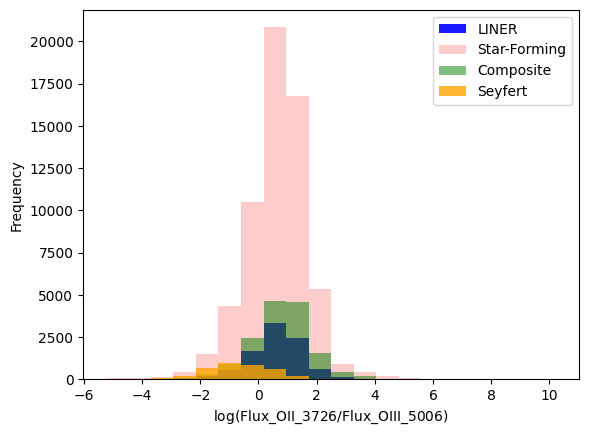

In [ ]:
plt.hist(LINER_df['Flux_OII_3726/Flux_OIII_5006'], bins=20, alpha=0.9, label='LINER', color='blue', range=(-5.25, 10.25))
plt.hist(Star_Forming_df['Flux_OII_3726/Flux_OIII_5006'], bins=20, alpha=0.2, label='Star-Forming', color='red', range=(-5.25, 10.25))
plt.hist(Composite_df['Flux_OII_3726/Flux_OIII_5006'], bins=20, alpha=0.5, label='Composite', color='green', range=(-5.25, 10.25))
plt.hist(Seyfert_df['Flux_OII_3726/Flux_OIII_5006'], bins=20, alpha=0.8, label='Seyfert', color='orange', range=(-5.25, 10.25))


# Add labels and legend
plt.xlabel(r'$\log(\mathrm{Flux\_OII\_3726/Flux\_OIII\_5006})$')
plt.ylabel('Frequency')
plt.legend(loc='upper right')


# Apply custom ticks to the x-axis

# Show the plot
plt.savefig('plot_3.png', bbox_inches='tight')
#plt.show()

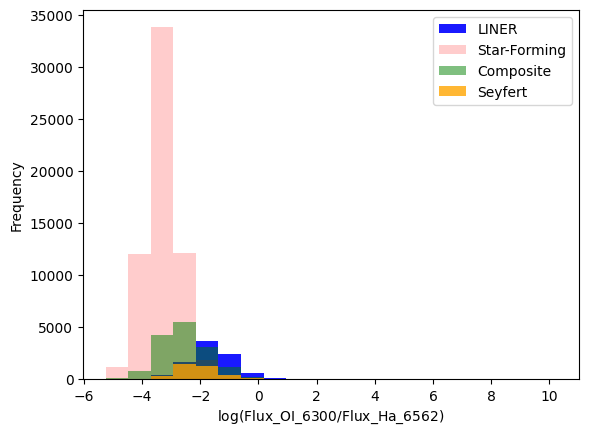

In [ ]:
plt.hist(LINER_df['Flux_OI_6300/Flux_Ha_6562'], bins=20, alpha=0.9, label='LINER', color='blue', range=(-5.25, 10.25))
plt.hist(Star_Forming_df['Flux_OI_6300/Flux_Ha_6562'], bins=20, alpha=0.2, label='Star-Forming', color='red', range=(-5.25, 10.25))
plt.hist(Composite_df['Flux_OI_6300/Flux_Ha_6562'], bins=20, alpha=0.5, label='Composite', color='green', range=(-5.25, 10.25))
plt.hist(Seyfert_df['Flux_OI_6300/Flux_Ha_6562'], bins=20, alpha=0.8, label='Seyfert', color='orange', range=(-5.25, 10.25))


# Add labels and legend
plt.xlabel(r'$\log(\mathrm{Flux\_OI\_6300/Flux\_Ha\_6562})$')
plt.ylabel('Frequency')
plt.legend(loc='upper right')


# Apply custom ticks to the x-axis

# Show the plot
plt.savefig('plot_4.png', bbox_inches='tight')
#plt.show()

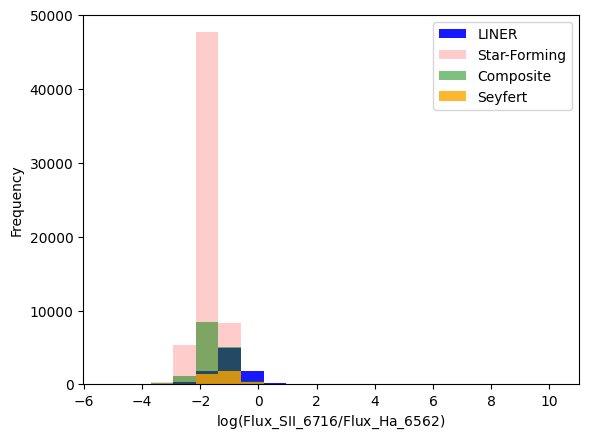

In [ ]:
plt.hist(LINER_df['Flux_SII_6716/Flux_Ha_6562'], bins=20, alpha=0.9, label='LINER', color='blue', range=(-5.25, 10.25))
plt.hist(Star_Forming_df['Flux_SII_6716/Flux_Ha_6562'], bins=20, alpha=0.2, label='Star-Forming', color='red', range=(-5.25, 10.25))
plt.hist(Composite_df['Flux_SII_6716/Flux_Ha_6562'], bins=20, alpha=0.5, label='Composite', color='green', range=(-5.25, 10.25))
plt.hist(Seyfert_df['Flux_SII_6716/Flux_Ha_6562'], bins=20, alpha=0.8, label='Seyfert', color='orange', range=(-5.25, 10.25))


# Add labels and legend
plt.xlabel(r'$\log(\mathrm{Flux\_SII\_6716/Flux\_Ha\_6562})$')
plt.ylabel('Frequency')
plt.legend(loc='upper right')


# Apply custom ticks to the x-axis

# Show the plot
plt.savefig('plot_5.png', bbox_inches='tight')
#plt.show()

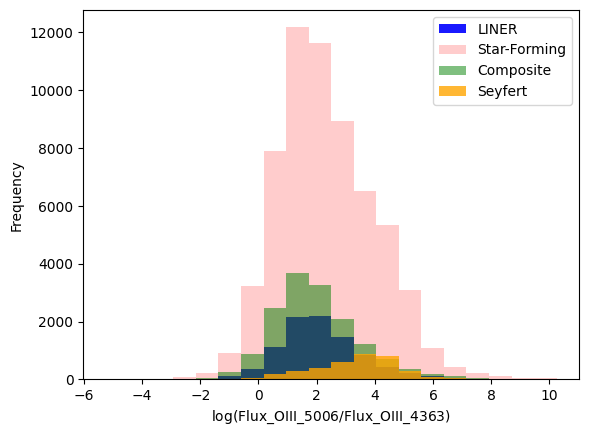

In [ ]:
plt.hist(LINER_df['Flux_OIII_5006/Flux_OIII_4363'], bins=20, alpha=0.9, label='LINER', color='blue', range=(-5.25, 10.25))
plt.hist(Star_Forming_df['Flux_OIII_5006/Flux_OIII_4363'], bins=20, alpha=0.2, label='Star-Forming', color='red', range=(-5.25, 10.25))
plt.hist(Composite_df['Flux_OIII_5006/Flux_OIII_4363'], bins=20, alpha=0.5, label='Composite', color='green', range=(-5.25, 10.25))
plt.hist(Seyfert_df['Flux_OIII_5006/Flux_OIII_4363'], bins=20, alpha=0.8, label='Seyfert', color='orange', range=(-5.25, 10.25))


# Add labels and legend
plt.xlabel(r'$\log(\mathrm{Flux\_OIII\_5006/Flux\_OIII\_4363})$')
plt.ylabel('Frequency')
plt.legend(loc='upper right')


# Apply custom ticks to the x-axis

# Show the plot
plt.savefig('plot_6.png', bbox_inches='tight')
#plt.show()

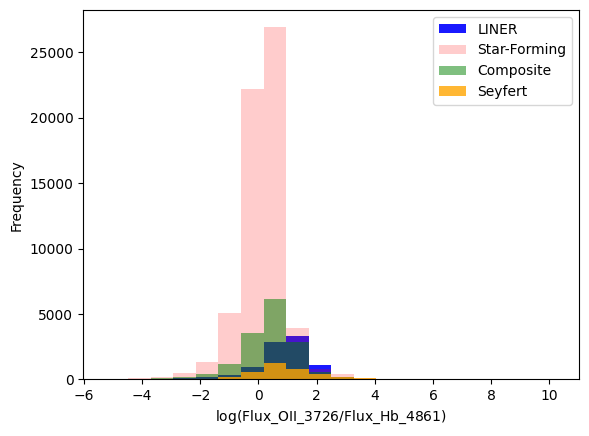

In [ ]:
plt.hist(LINER_df['Flux_OII_3726/Flux_Hb_4861'], bins=20, alpha=0.9, label='LINER', color='blue', range=(-5.25, 10.25))
plt.hist(Star_Forming_df['Flux_OII_3726/Flux_Hb_4861'], bins=20, alpha=0.2, label='Star-Forming', color='red', range=(-5.25, 10.25))
plt.hist(Composite_df['Flux_OII_3726/Flux_Hb_4861'], bins=20, alpha=0.5, label='Composite', color='green', range=(-5.25, 10.25))
plt.hist(Seyfert_df['Flux_OII_3726/Flux_Hb_4861'], bins=20, alpha=0.8, label='Seyfert', color='orange', range=(-5.25, 10.25))


# Add labels and legend
plt.xlabel(r'$\log(\mathrm{Flux\_OII\_3726/Flux\_Hb\_4861})$')
plt.ylabel('Frequency')
plt.legend(loc='upper right')


# Apply custom ticks to the x-axis

# Show the plot
plt.savefig('plot_7.png', bbox_inches='tight')
#plt.show()

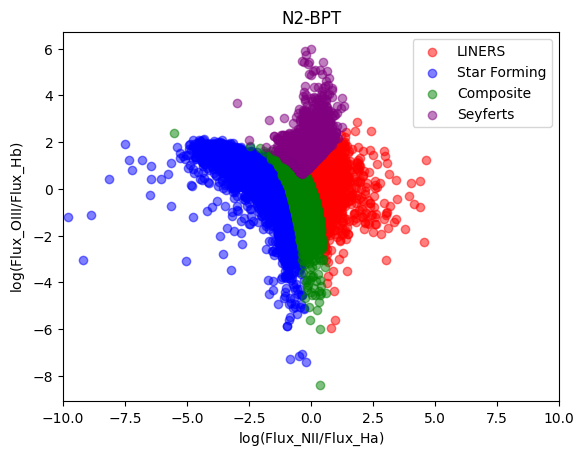

In [ ]:
plt.scatter(LINER_df['Flux_NII_6583/Flux_Ha_6562'], LINER_df['Flux_OIII_5006/Flux_Hb_4861'], label='LINERS', color='red', alpha=0.5)
plt.scatter(Star_Forming_df['Flux_NII_6583/Flux_Ha_6562'], Star_Forming_df['Flux_OIII_5006/Flux_Hb_4861'], label='Star Forming', color='blue', alpha=0.5)
plt.scatter(Composite_df['Flux_NII_6583/Flux_Ha_6562'], Composite_df['Flux_OIII_5006/Flux_Hb_4861'], label='Composite', color='green', alpha=0.5)
plt.scatter(Seyfert_df['Flux_NII_6583/Flux_Ha_6562'], Seyfert_df['Flux_OIII_5006/Flux_Hb_4861'], label='Seyferts', color='purple', alpha=0.5)



# Set labels and title
plt.xlabel(r'$\log(\mathrm{Flux\_NII/Flux\_Ha})$')
plt.ylabel(r'$\log(\mathrm{Flux\_OIII/Flux\_Hb})$')
plt.title('N2-BPT')

# Add a legend
plt.legend()
plt.xlim(-10, 10)
# Show the plot
plt.savefig('bpt.png', bbox_inches='tight')
plt.show()


In [ ]:
training_data.head()

,specObjID,ra,dec,redshift,Flux_NII_6583/Flux_Ha_6562,Flux_OIII_5006/Flux_Hb_4861,Flux_OII_3726/Flux_OIII_5006,Flux_OI_6300/Flux_Ha_6562,Flux_SII_6716/Flux_Ha_6562,Flux_OIII_5006/Flux_OIII_4363,Flux_OII_3726/Flux_Hb_4861,Classification
0,301885788210096128,149.68988,1.003729,0.081116,0.425402,0.256996,2.490051,0.034856,0.184156,3.641603,0.639933,Star Forming
1,301887437477537792,149.70765,0.836692,0.012681,0.178823,1.028018,20.051688,0.043506,0.302325,22.231431,20.613505,Star Forming
2,301888536989165568,149.64552,1.014263,0.063597,0.315205,0.310238,3.621111,0.032175,0.177128,10.660915,1.123406,Star Forming
3,301888811867072512,149.70426,1.081266,0.079338,1.397530,0.686329,6.528850,0.169813,0.146544,21.957178,4.480941,LINER
4,301889361622886400,149.65731,0.870752,0.039029,0.202346,1.032948,1.988839,0.032636,0.216796,109.950507,2.054367,Star Forming


In [ ]:
flux_training_data = training_data.drop(columns = ['specObjID', 'ra', 'dec', 'redshift','Classification'])

In [ ]:
Galaxy_Classifications = training_data['Classification']

In [ ]:
Galaxy_Classifications.head()

0    Star Forming
1    Star Forming
2    Star Forming
3           LINER
4    Star Forming
Name: Classification, dtype: object

In [ ]:
def change_values(value):
    if (value == 'Star Forming'):
      return 0
    if (value == "LINER"):
      return 1
    if (value == "Composite"):
      return 2
    if (value == 'Seyfert'):
      return 3

In [ ]:
Galaxy_Classifications = Galaxy_Classifications.apply(change_values)

In [ ]:
Galaxy_Classifications.head()

0    0
1    0
2    0
3    1
4    0
Name: Classification, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(flux_training_data, Galaxy_Classifications, test_size=0.2, random_state=42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(flux_training_data.shape[1],)),  # Input layer based on the number of features
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  # Output layer with 3 neurons for the three classes and softmax activation
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# X_train = np.asarray(X_train).astype(np.float32)
# y_train = np.asarray(y_train).astype(np.float32)

In [ ]:
model.fit(X_train, y_train, epochs=10, verbose=0)

In [ ]:
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy * 100:.2f}%")

565/565 [==============================] - 1s 919us/step - loss: 0.2976 - accuracy: 0.9665
Test Loss: 0.2976, Test Accuracy: 96.65%


In [ ]:
unique_values = set(y_train)
print(unique_values)

{0, 1, 2, 3}


In [ ]:
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

In [ ]:
num_layers = [1, 2, 3, 4, 5, 6]


def grid_search_num_layers(num_layer):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Input(shape=(flux_training_data.shape[1],)))
  for i in range(num_layer):
    model.add(tf.keras.layers.Dense(64, activation='relu'))
  model.add(tf.keras.layers.Dense(4, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

results = []
reports = []
for num_layer in num_layers:
  #Build model for given \number of layers
  model = grid_search_num_layers(num_layer)
  #Fit the data
  history = model.fit(X_train, y_train, epochs=5, verbose=0)
  #Test accuracy and add to the list
  loss, accuracy = model.evaluate(X_test, y_test)
  results.append(accuracy)
  #Check specific predictions
  predictions = model.predict(X_test)
  y_test_class = np.argmax(y_test, axis=1)
  y_pred_class = np.argmax(predictions, axis=1)
  report = classification_report(y_test_class, y_pred_class)
  reports.append(report)
print(results)



565/565 [==============================] - 1s 880us/step
[0.9323254227638245, 0.959406316280365, 0.972642183303833, 0.9628399014472961, 0.9762418866157532, 0.9770725965499878]


In [ ]:
num_layers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


def grid_search_num_layers(num_layer):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Input(shape=(flux_training_data.shape[1],)))
  for i in range(num_layer):
    model.add(tf.keras.layers.Dense(32, activation='relu'))
  model.add(tf.keras.layers.Dense(4, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

results = []
reports = []
for num_layer in num_layers:
  #Build model for given \number of layers
  model = grid_search_num_layers(num_layer)
  #Fit the data
  history = model.fit(X_train, y_train, epochs=5, verbose=0)
  #Test accuracy and add to the list
  loss, accuracy = model.evaluate(X_test, y_test)
  results.append(accuracy)
  #Check specific predictions
  predictions = model.predict(X_test)
  y_test_class = np.argmax(y_test, axis=1)
  y_pred_class = np.argmax(predictions, axis=1)
  report = classification_report(y_test_class, y_pred_class)
  reports.append(report)
print(results)


565/565 [==============================] - 1s 883us/step
[0.9559727311134338, 0.9142714738845825, 0.9671041965484619, 0.9741928577423096, 0.9707038998603821, 0.9772941470146179, 0.9642243981361389, 0.9691532254219055, 0.9677687287330627, 0.9277288317680359]


In [ ]:
print(reports[8])

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     12314
           1       0.96      0.94      0.95      1864
           2       0.95      0.89      0.92      3137
           3       0.96      0.90      0.93       742

    accuracy                           0.97     18057
   macro avg       0.96      0.93      0.95     18057
weighted avg       0.97      0.97      0.97     18057

